<a href="https://colab.research.google.com/github/quantum636/H-M_EDA/blob/main/Google_Play_Store_Apps(EDA_%26_Visualizations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'google-playstore-apps:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F157336%2F2344679%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240220%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240220T064153Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7405dda3e1b50c10f69d64c4e1e3fc77a3df3744175735b39702437780af05b1cd0486b3fd07f0abb48db5d439955b06c9569bf4f0a82d2cb472be5996e8f6738b9f10021990e0c85fbdb1289dc03c7e4e45a21053cc3600e2bcf281d183d09ef8b5f4f984895cb8b64d0b441f05046740e1321d16462187a04ec60783e78f41400c6ed519997dcc815df86fbb9c5ed5235d877caeb5b65df2a5ec6d35eb9189838b243f8fac0e4dafe8fbfc5e4cbce88b24d6d568b6696d5b44b30bb67a8d213d8db71bed37b999f8f7a5ce49595957248b37ce659c30e40e5265fd237dacb25548026aeb4e99f67970d55de61ade4105a6ddb4437eb8920b7d932a61ede70d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-playstore-apps/Google-Playstore.csv


### Importing the dependecies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preparation and clening

- load the csv file with pandas
- creating the dataframe and understanding the data present in the dataset
- dealing with the missing data and the incorrect records

In [ ]:
df =pd.read_csv(r"/kaggle/input/google-playstore-apps/Google-Playstore.csv")

In [ ]:
df.head(5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

### Observations

1. The dataset having 2312944 rows and 24 colimns
2. The columns in the dataset are:


   App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'


### Descriptive Statistics

In [ ]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


### Observation:

1. we have 5 numarical columns in our dataset
   
   to look the entire columns we can use pandas function pd.set_option()


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


#### Missing values in the data

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### Explolatory Data Analysis and Visulizations

### Let's plot the missing null values

Text(0.5, 1.0, 'Missing null values')

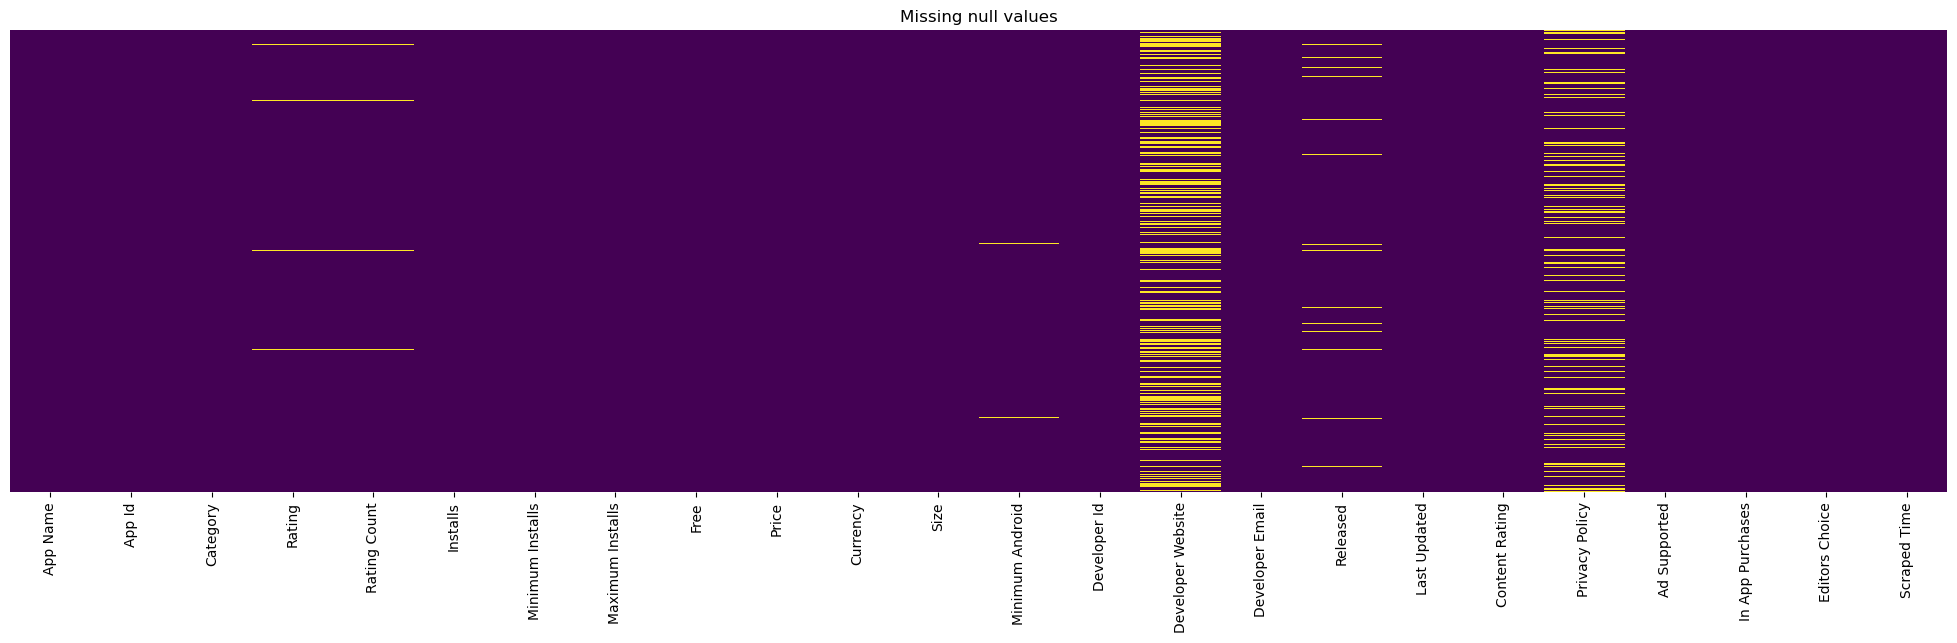

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (25, 6)
sns.heatmap(df.isnull(), yticklabels= False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

### Let's see the missing percentage in data

In [ ]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_percentage

Developer Website    3.289466e-01
Privacy Policy       1.819988e-01
Released             3.071972e-02
Rating               9.893452e-03
Rating Count         9.893452e-03
Minimum Android      2.823242e-03
Size                 8.474049e-05
Currency             5.836717e-05
Installs             4.626139e-05
Minimum Installs     4.626139e-05
Developer Id         1.426753e-05
Developer Email      1.340283e-05
App Name             8.646988e-07
App Id               0.000000e+00
Price                0.000000e+00
Free                 0.000000e+00
Maximum Installs     0.000000e+00
Last Updated         0.000000e+00
Content Rating       0.000000e+00
Category             0.000000e+00
Ad Supported         0.000000e+00
In App Purchases     0.000000e+00
Editors Choice       0.000000e+00
Scraped Time         0.000000e+00
dtype: float64

### Let's plot the missing percentage of null values

Text(0.5, 1.0, 'Missing percentage of null values')

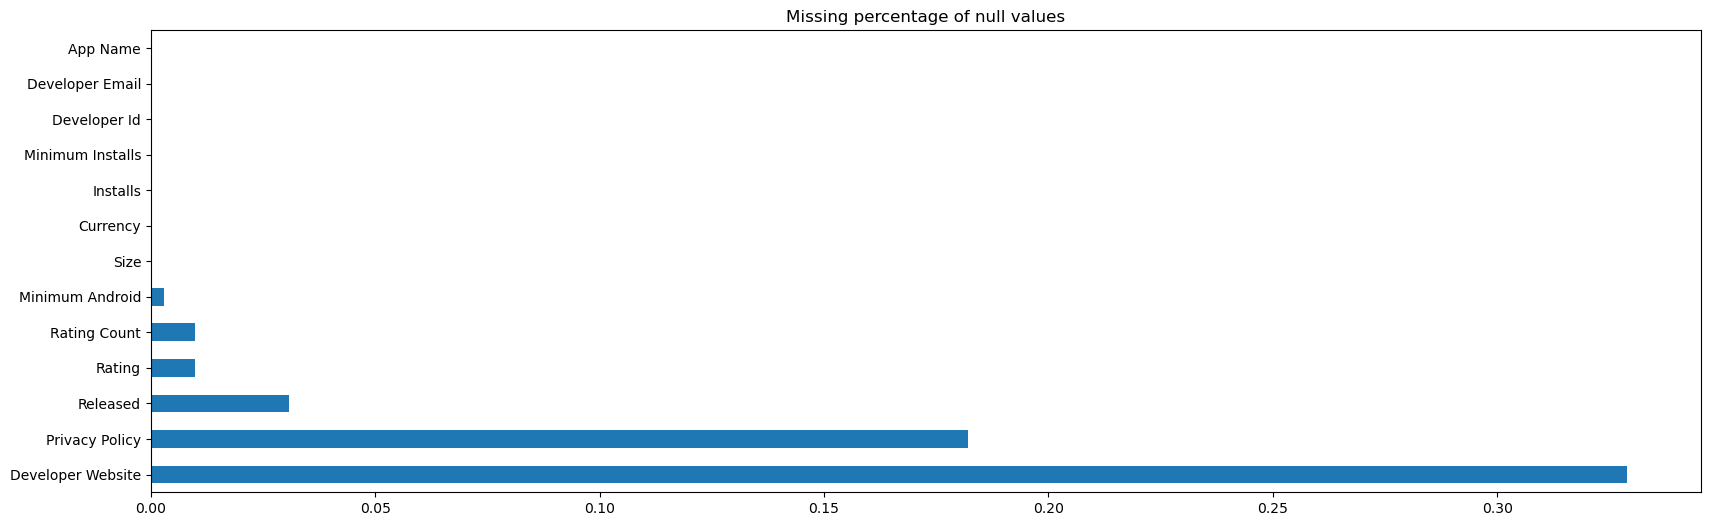

In [ ]:
missing_percentage = missing_percentage[missing_percentage  != 0] # only the missing data
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
missing_percentage.plot(kind = 'barh')
plt.title("Missing percentage of null values")

### Observation :

Dealing with the null values
1. The columns having highest percentage of null values are:
   - Develpor Website
   - Privacy Policy

These two are not that much helpful if we want, we can drop these columns and in the futher steps we drop and add some features in the dataset after the Analysis.

1. we can drop the small null values for the columns
   
   - Size
   - Currency
   - installs
   - minimum installs
   - Develpor Id
   - Develpor Email
2. Rating, rating Count, Released are important columns so it is good to fill the null values.

   - Rating
   - Rating Count
   - Minimum Andoride
   - Released

### From Observation 2 droping the null values of the columns got selected

In [ ]:
df.dropna(subset = ['App Name','Size','Currency', 'Installs','Minimum Installs','Developer Id','Developer Email'])

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [ ]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

### Now Let's start cleaning the each row

checking any duplicate in the App Name

In [ ]:
boolean = df['App Name'].duplicated().any()
boolean

True

In [ ]:
df['App Name'].value_counts()

Tic Tac Toe                          382
Calculator                           261
Flashlight                           256
BMI Calculator                       201
Age Calculator                       190
                                    ... 
Полиглот 16 Lite - Hемецкий язык.      1
Ripplfect                              1
RestockMe                              1
Medcem Checklist                       1
Biliyor Musun - Sonsuz Yarış           1
Name: App Name, Length: 2177944, dtype: int64

In [ ]:
# from the above cell output we can see that App Name columns has multiple rows. Let's check out that data in those rows is identical or not
df[df['App Name'] == 'Tic Tac Toe']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,10+,10.0,30,True,0.0,USD,3.4M,4.0 and up,ATTE AKA FRANCOIS,https://ne2ad32ee.app-ads-txt.com,dev.atte.francois@gmail.com,"May 18, 2018","May 18, 2018",Everyone,NaN,True,False,False,2021-06-15 20:23:22
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,10+,10.0,31,True,0.0,USD,34M,4.3 and up,Smart Digital Tools,NaN,msms.zaman@gmail.com,"Nov 2, 2020","Nov 18, 2020",Everyone,https://smartdailytools.blogspot.com/2020/09/p...,True,False,False,2021-06-15 20:32:58
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,"5,000+",5000.0,6379,True,0.0,USD,7.4M,7.0 and up,Sundeep Reddy Thirumuru,NaN,sundeep.thirumuru@gmail.com,"Apr 13, 2021","Jun 03, 2021",Everyone,NaN,True,False,False,2021-06-15 20:44:27
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,500+,500.0,922,True,0.0,USD,8.6M,4.1 and up,SteadFast Games,NaN,devmethyl@outlook.com,"Feb 13, 2020","Feb 13, 2020",Everyone,NaN,True,False,False,2021-06-15 20:47:17
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,10+,10.0,38,True,0.0,USD,927k,4.0 and up,SnatchDreams,https://www.snatchdreams.net,snatchdreams@gmail.com,"Jul 16, 2017","Oct 16, 2019",Everyone,https://www.snatchdreams.net/privacy/tic-tac-toe/,True,False,False,2021-06-15 20:50:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.8,9269.0,"500,000+",500000.0,800662,True,0.0,USD,2.3M,2.3 and up,Mobile Apps Pro,NaN,smartyka@gmail.com,"Jan 9, 2015","May 20, 2015",Everyone,http://mobileappspro.yolasite.com,True,False,False,2021-06-16 12:23:56
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.0,0.0,50+,50.0,50,True,0.0,USD,3.5M,5.0 and up,Jainam Jhaveri,https://erjainam.com,engineerjainam@gmail.com,"Sep 2, 2018","Sep 02, 2018",Everyone,https://docs.google.com/document/d/1Tyi5D3VxZu...,True,False,False,2021-06-16 12:31:30
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.7,7.0,10+,10.0,34,True,0.0,USD,5.3M,4.1 and up,Cybertron's Hogwarts,http://prudhvikchirunomula.pythonanywhere.com/,prudhvik.1996@gmail.com,"Sep 4, 2019","Sep 17, 2019",Everyone,NaN,False,False,False,2021-06-16 12:32:05
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.8,20.0,100+,100.0,462,True,0.0,USD,2.1M,2.2 and up,Infuse Apps,http://www.infuseapps.com,infuseandroidapps@gmail.com,"Jan 18, 2015","Jan 18, 2015",Everyone,NaN,True,False,False,2021-06-16 12:47:11


In [ ]:
df['App Id'].duplicated().any()

False

In [ ]:
df['App Id'].value_counts()

com.ishakwe.gakondo              1
co.tapcart.app.id_GQEQ9eXxJg     1
com.apocalipseescatologia.app    1
com.puzzlegame.wordconnect       1
rankr.io.srigitanjali            1
                                ..
com.arabeauty.ringtones2020      1
com.bibigame.linkhalo            1
com.ilmasoftkids.mfb_eng         1
com.app.colonybuddy              1
com.yyazilim.biliyormusun        1
Name: App Id, Length: 2312944, dtype: int64

1 . we have Apps with the same names but with the unique App IDs so the Apps are differed based on the App IDs

### Lets Explore the numerical columns

In [ ]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [ ]:
df['Installs'] = df['Installs'].str.split('+').str[0]  # Remove the + symbol
df['Installs'].replace(',','', regex=True, inplace=True)   # Remove the + symbol

In [ ]:
df['Installs'] = df['Installs'].replace (to_replace=[np.nan,""], value=0).astype('int64')   # Converting it to the int type

In [ ]:
df['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [ ]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [ ]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

### The Size of data can be in GB,MB and KB we will convert the data into the size in MB

In [ ]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [ ]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

- Here we get mismatched value with the data we got the value 1,018 we can drop it or we can assume as it may be a '.'(dot) that would incorrectly added to the dataset. so let assume it as dot for now and replace the ',' with dot '.'.

In [ ]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

- Conversion of kbs to MB

In [ ]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [ ]:
#df['Size'] = df['Size'].apply(lambda x: float(x))

- Conversion of data GBs to MBs

In [ ]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [ ]:
df.dtypes['Size']

dtype('O')

In [ ]:
df['Minimum Android']

0            7.1 and up
1            5.0 and up
2          4.0.3 and up
3          4.0.3 and up
4            4.1 and up
               ...     
2312939      4.1 and up
2312940      4.1 and up
2312941      5.0 and up
2312942      5.0 and up
2312943      5.0 and up
Name: Minimum Android, Length: 2312944, dtype: object

In [ ]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3          Everyone
4          Everyone
             ...   
2312939        Teen
2312940    Everyone
2312941    Everyone
2312942    Everyone
2312943    Everyone
Name: Content Rating, Length: 2312944, dtype: object

In [ ]:
df['Released']

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312939             NaN
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: Released, Length: 2312944, dtype: object

In [ ]:
df['Last Updated']

0          Feb 26, 2020
1          May 06, 2021
2          Aug 19, 2019
3          Oct 13, 2018
4          Nov 12, 2018
               ...     
2312939    Jun 01, 2021
2312940    Feb 02, 2018
2312941    Aug 19, 2018
2312942    May 05, 2021
2312943    Aug 19, 2019
Name: Last Updated, Length: 2312944, dtype: object

In [ ]:
df['Privacy Policy']

0                         https://beniyizibyose.tk/projects/
1          https://dev4phones.wordpress.com/licencia-de-uso/
2          https://www.vietnamairlines.com/vn/en/terms-an...
3                                                        NaN
4                                http://www.horodyski.com.pl
                                 ...                        
2312939               http://a.4399sy.com.hk/user/aggreement
2312940      http://www.oru.edu/about-oru/privacy-policy.php
2312941    https://appoworld.000webhostapp.com/datastruct...
2312942    https://docs.google.com/document/d/1x-9reZuLRX...
2312943    https://biliyor-musun-sons.flycricket.io/priva...
Name: Privacy Policy, Length: 2312944, dtype: object

In [ ]:
df['Scraped Time']

0          2021-06-15 20:19:35
1          2021-06-15 20:19:35
2          2021-06-15 20:19:35
3          2021-06-15 20:19:35
4          2021-06-15 20:19:35
                  ...         
2312939    2021-06-16 12:59:18
2312940    2021-06-16 12:59:19
2312941    2021-06-16 12:59:19
2312942    2021-06-16 12:59:19
2312943    2021-06-16 12:59:19
Name: Scraped Time, Length: 2312944, dtype: object

In [ ]:
df['Free']

KeyError: 'Free'

In [ ]:
# lets clean the Content rating column
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [ ]:
df['Content Rating'].value_counts()

Everyone    2022243
Teen         230276
Adults        60425
Name: Content Rating, dtype: int64

### Observations :

1. We have varies Categories in the Content Rating Columns:
   - Everyone
   - Teen
   - Mature 17+
   - Everyone
   - Unrated
   - Adults only 18+

Now, we makes this Categories to a simple 3 Categories for better Understanding:
Everyone, teen, Adults
  - Mature 17+ ---> to Adults
  - Everyone 10+ ---> to TEEN
  - Unrated ---> to Everyone
  - Adults only 18+ ---> to Adults

In [ ]:
df["Content Rating"] = df["Content Rating"].replace("Unrated", "Everyone")
df["Content Rating"] = df["Content Rating"].replace("Everyone 10+", "Teen")
df["Content Rating"] = df["Content Rating"].replace("Mature 17+", "Adults")
df["Content Rating"] = df["Content Rating"].replace("Adults only 18+", "Adults")

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [ ]:
# Creataing the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

KeyError: 'Free'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               object 
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
 24  Rating Type        object 
 25  Rating type       

In [ ]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [ ]:
df['Rating Count'].max()

138557570.0

In [ ]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <=10000.0), 'Rating type'] = 'Less than 10k'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <=500000.0), 'Rating type'] = 'Between 10k and 500k'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <=138557570.0), 'Rating type'] = 'More than 500k'
df['Rating Type'].value_counts()

NoRatingProvided    2312944
Name: Rating Type, dtype: int64

In [ ]:
df['Rating type']

0                           NaN
1                 Less than 10k
2                           NaN
3                 Less than 10k
4                           NaN
                   ...         
2312939    Between 10k and 500k
2312940                     NaN
2312941                     NaN
2312942           Less than 10k
2312943           Less than 10k
Name: Rating type, Length: 2312944, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               object 
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
 24  Rating Type        object 
 25  Rating type       

## Question and Answers:
 - What are the top 10 Categories that are installed from the Google Play Store?
 - Which are the Categories that are getting installed the most in the top Categories?
 - which is the highest rated categories?
 - How does the size of the application impacts the installation?
 - What are the top 5 paid Apps based with highest ratings and installs?

###  What are the top 10 Categories that are installed from the Google Play Store?

In [ ]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [ ]:
top_Category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [ ]:
top_Category

,Category,Count
0,Education,241090
1,Music & Audio,154906
2,Tools,143988
3,Business,143771
4,Entertainment,138276
5,Lifestyle,118331
6,Books & Reference,116728
7,Personalization,89210
8,Health & Fitness,83510
9,Productivity,79698


In [ ]:
Category_installs = df.groupby(['Category'])[['Installs']].sum()

In [ ]:
Category_installs

,Installs
Category,
Action,17400377388
Adventure,5390119567
Arcade,14501333037
Art & Design,1116398903
Auto & Vehicles,1594745568
Beauty,404328792
Board,3290826664
Books & Reference,4820200784
Business,5236670097


In [ ]:
top_Category_installs = pd.merge(top_Category, Category_installs, on='Category')
top_Category_installs.head(10)

,Category,Count,Installs
0,Education,241090,5984072881
1,Music & Audio,154906,14239412474
2,Tools,143988,71440471479
3,Business,143771,5236670097
4,Entertainment,138276,17108505414
5,Lifestyle,118331,5997923997
6,Books & Reference,116728,4820200784
7,Personalization,89210,9252977243
8,Health & Fitness,83510,4586601952
9,Productivity,79698,28314053128


In [ ]:
top_10_Categories_installs = top_Category_installs.head(10).sort_values(by = ['Installs'], ascending= False)

<Axes: title={'center': 'Top 10 installed Categories'}, xlabel='Category', ylabel='Installs'>

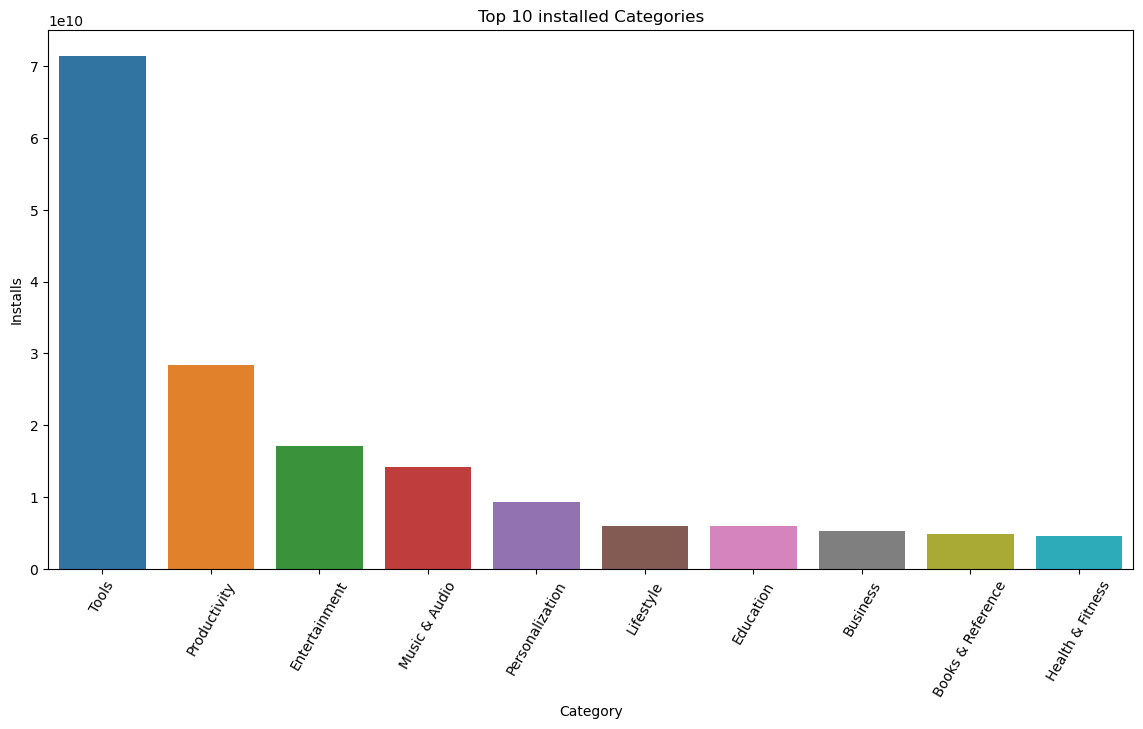

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 installed Categories")
sns.barplot(x= top_10_Categories_installs.Category, y = top_10_Categories_installs.Installs)

### what are the 10 Categories in playstore as per the count?

<Axes: title={'center': 'top 10 Categories'}, xlabel='Category', ylabel='Count'>

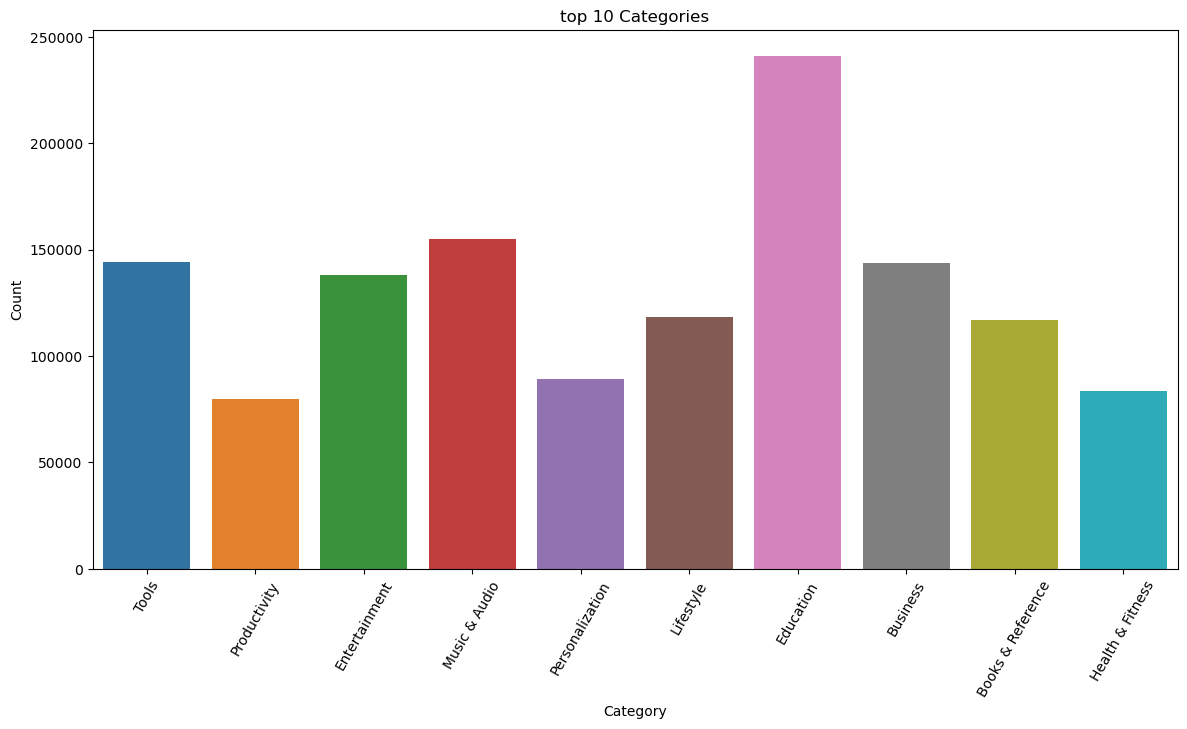

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("top 10 Categories")
sns.barplot(x = top_10_Categories_installs.Category, y = top_10_Categories_installs.Count)

### Visulize TOTAL Categories and the Count of Apps in each Catgory

<Axes: title={'center': 'Total Categories and count of Applications in each category'}, xlabel='Category', ylabel='Count'>

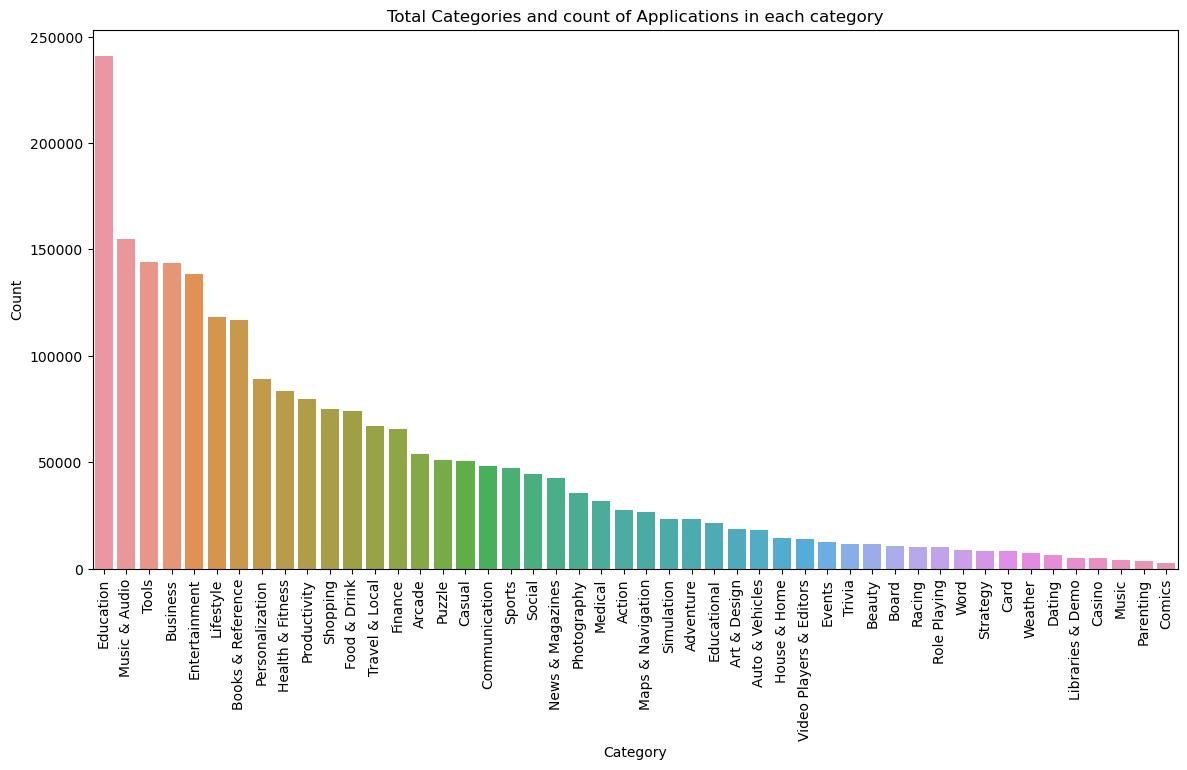

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category_installs")
plt.ylabel("Number of applications")
plt.title("Total Categories and count of Applications in each category")
sns.barplot(x = top_Category_installs.Category, y =top_Category_installs.Count)

### Visualize Total Categories and installed Applications in each category

<Axes: title={'center': 'Total Categories and Installation of Applications in each category'}, xlabel='Category', ylabel='Installs'>

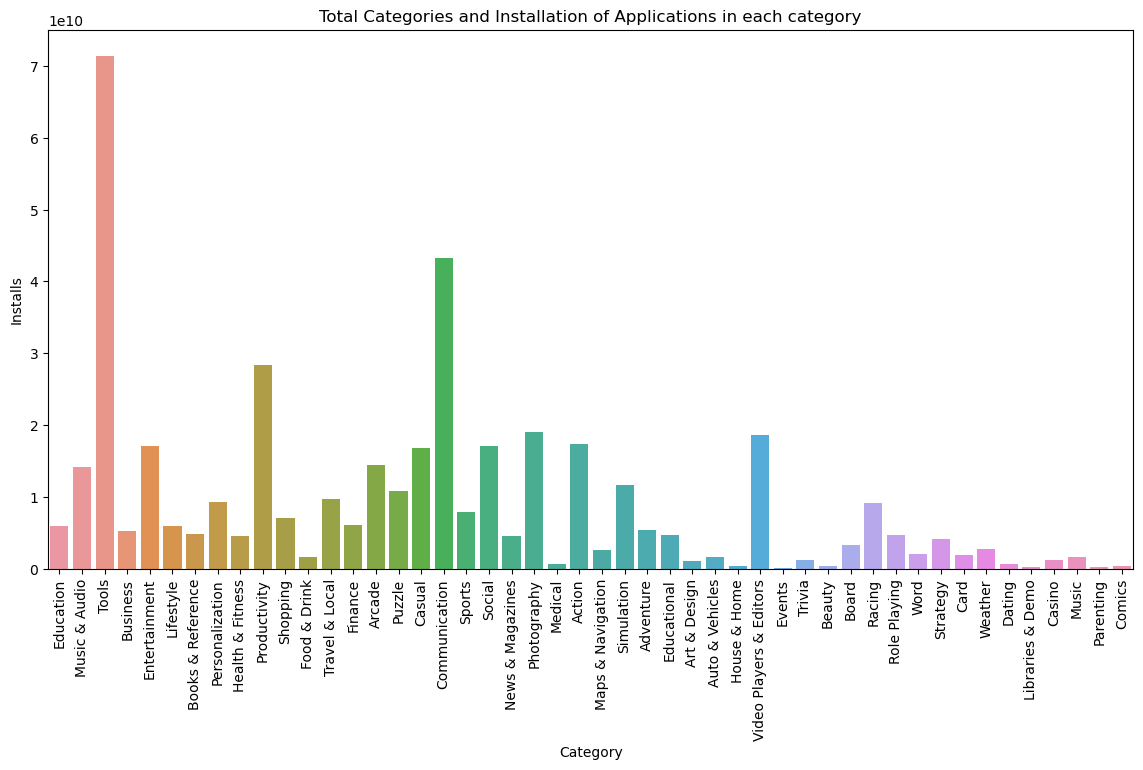

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Total Categories and Installation of Applications in each category")
sns.barplot(x = top_Category_installs.Category, y =top_Category_installs.Installs)

### Rating Distribution

/tmp/ipykernel_32/1779276011.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df.Rating, color="Blue", shade= True)


Text(0.5, 1.0, 'Distribution of Rating')

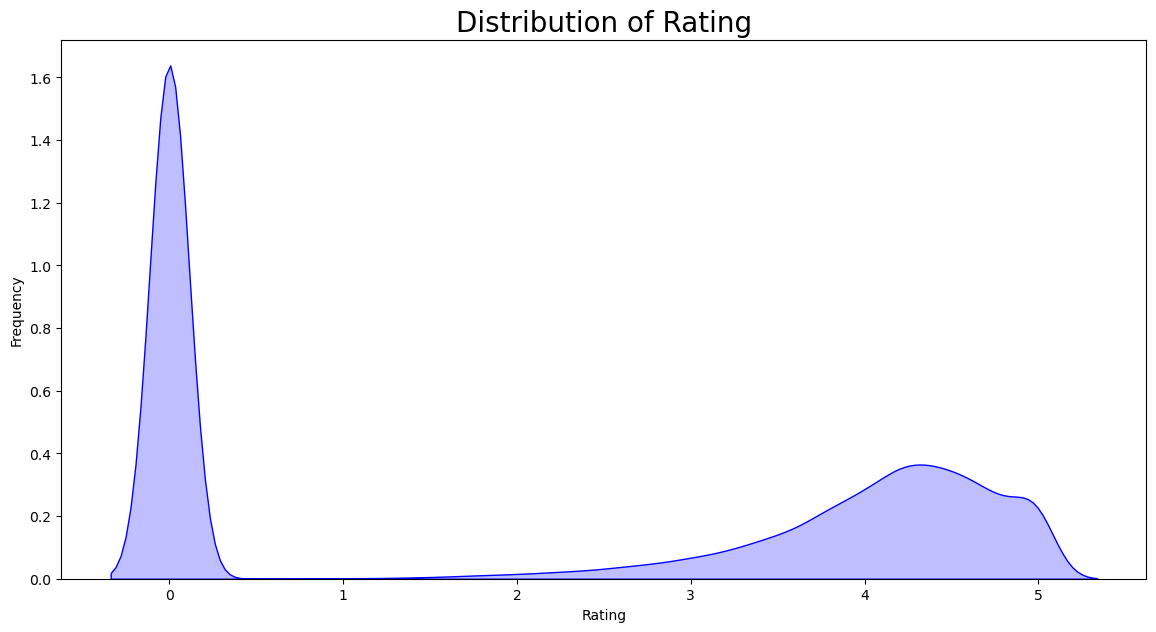

In [ ]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.Rating, color="Blue", shade= True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating', size = 20)

<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

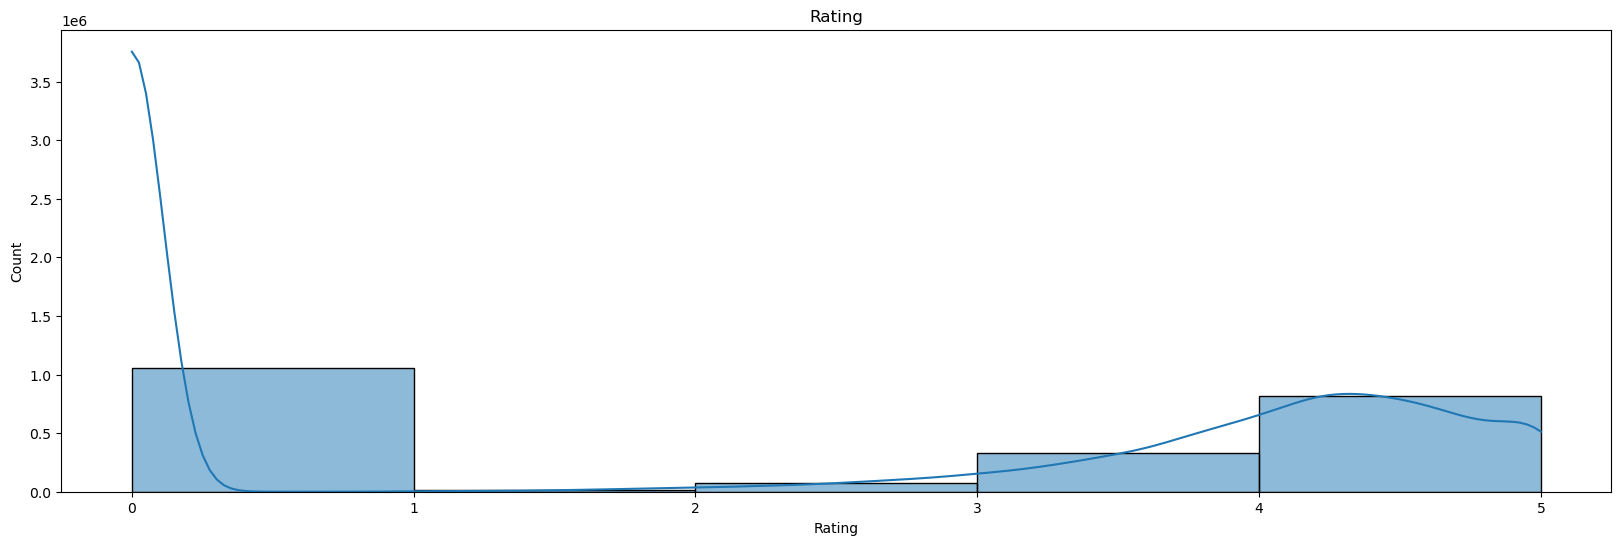

In [ ]:
plt.title("Rating")
sns.histplot(df.Rating, kde=True,bins=5)

### Observation

From the above two plots we can see that most people does not give a rating, but one more thing that comes out from this graph as well is that people tend to give 4+ rating the most

### Q - What is the highest rated Category?

<Axes: title={'center': 'All Categories Rating '}, xlabel='Category', ylabel='Rating'>

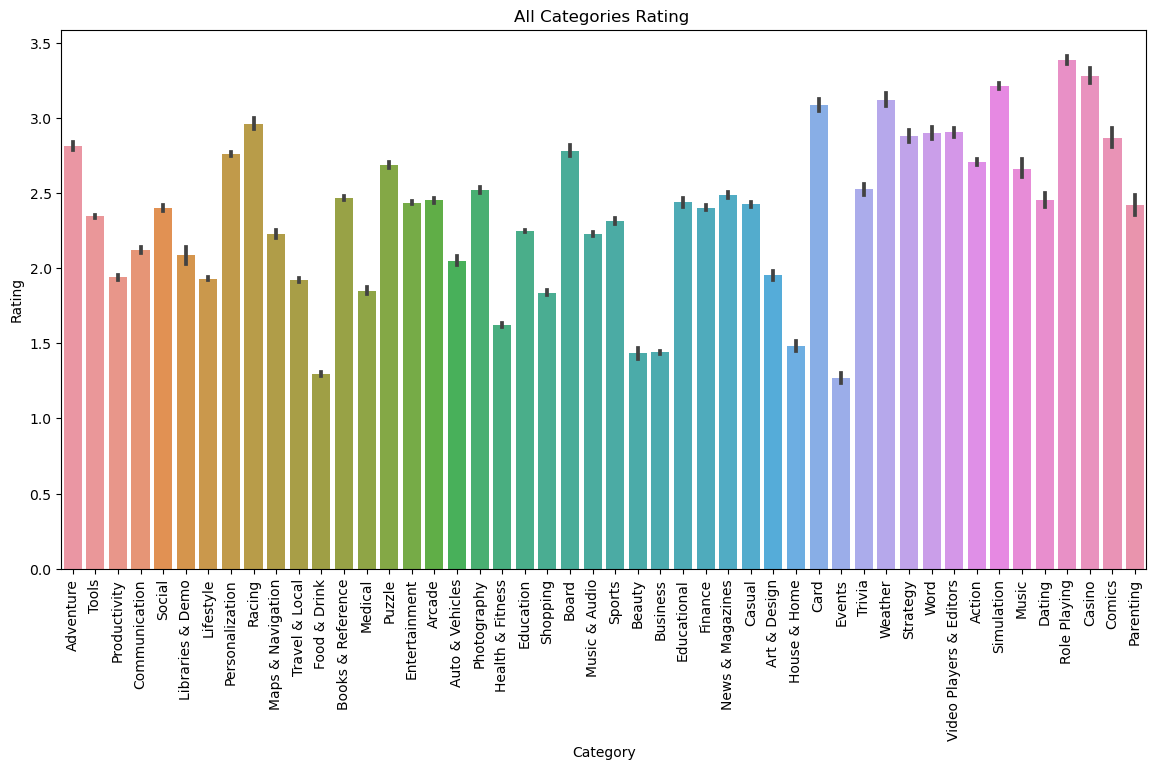

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Higest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.Category, y = df.Rating)

### Ans- From the above plot we can see that Role Playing is the Highest Rated Category

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

<Axes: title={'center': 'Content Rating and Maximum installations '}, xlabel='Maximum Installs', ylabel='Rating Count'>

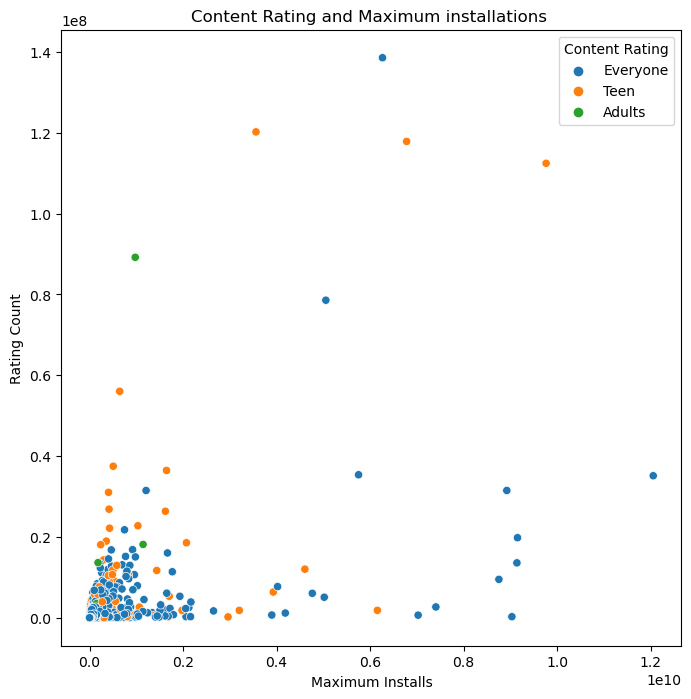

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x = 'Maximum Installs', y ='Rating Count',data=df, hue='Content Rating')

### Observation

 This scatter plot shows us that : if we exclude everyone from the plot and when focus on teen and Adults we can see that teens have much engagement in terms of downloads and rating Count.

In [ ]:
# Visulize the installation Types in each category

df['Installs'].min(),df['Installs'].max()

(0, 10000000000)

- there is high variance in the number of installs, we need to reduce it so we can use a log value for this column,otherwise it would be unable to see the data when we visulize

In [ ]:
category_type_installs = df.groupby(['Category'])[['Installs']].sum().reset_index()
category_type_installs['log_Installs'] = np.log10(category_type_installs['Installs'])

<Axes: title={'center': 'Number of installed Apps type wise according to Category'}, xlabel='Category', ylabel='log_Installs'>

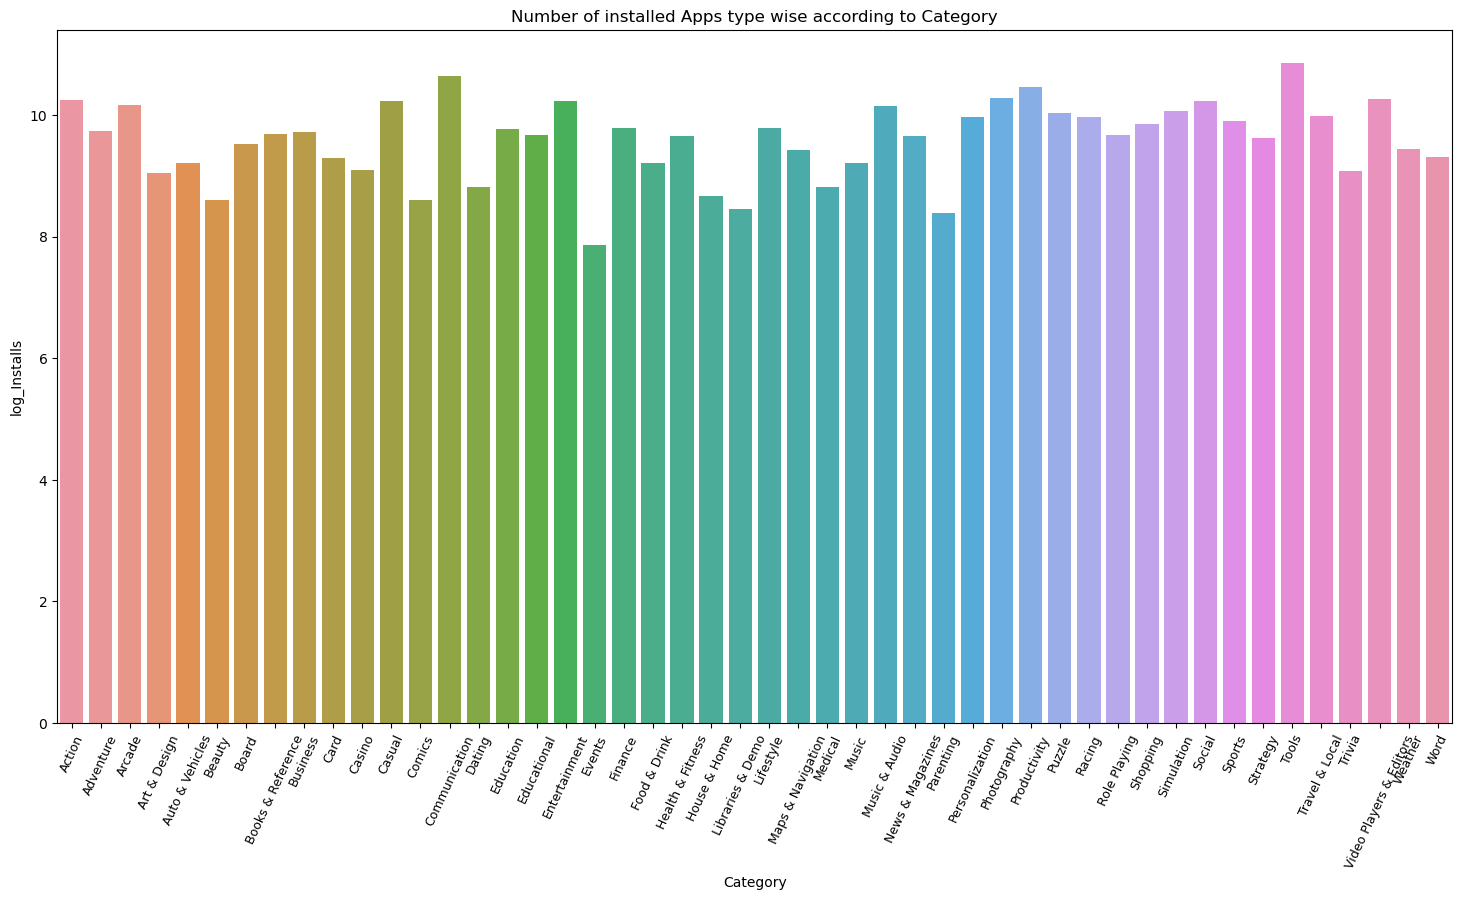

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65, fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot(x= 'Category', y = 'log_Installs',  data=category_type_installs)

### Ans - from the above plot we can see that size impacts the number of installations. Applications with lager size are less installed by the end user.

In [ ]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.013038,0.011214,0.011214,0.012615,-0.003674,0.160502,0.153820,0.019485
Rating Count,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.005294,0.025737,0.137311
Installs,0.011214,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002250,0.014179,0.059932
Minimum Installs,0.011214,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002250,0.014179,0.059932
Maximum Installs,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.002882,0.016101,0.064206
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,-0.034276,-0.002634,0.000503
Ad Supported,0.160502,0.005294,0.002250,0.002250,0.002882,-0.034276,1.000000,0.138312,0.005702
In App Purchases,0.153820,0.025737,0.014179,0.014179,0.016101,-0.002634,0.138312,1.000000,0.046078
Editors Choice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.005702,0.046078,1.000000


/tmp/ipykernel_32/1574887756.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar= True, cmap='coolwarm')


<Axes: >

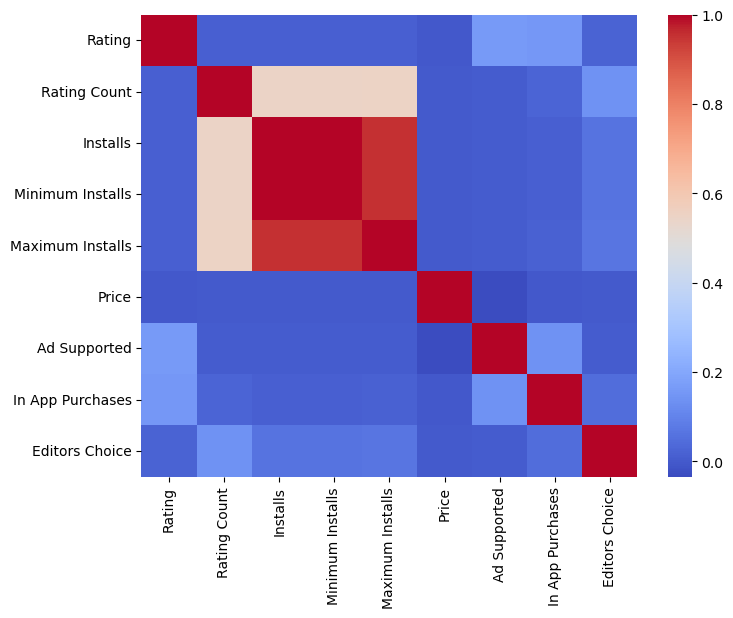

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cbar= True, cmap='coolwarm')

### Observation like AdSupport and inappPurchases are correlated to app rating. So we can say that if the app provides customers support and have subscription plans we can engage more customers. we can also see from the same graph that the editor's choice plays an important role as well. with high editor choice we can see high ratings count and high installs.

### Q - What are the Top paid Apps based with highest rating and installs?

In [ ]:
df['Installs'].max()

10000000000

In [ ]:
paid_apps  = df[(df['Type']== 'Paid') & (df['Installs'] >= 5000000)]
paid_apps

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Type,Rating Type,Rating type
6302,True Skate,com.trueaxis.trueskate,Sports,4.4,191460.0,5000000,5000000.0,7040478,1.99,USD,99,4.1 and up,True Axis,http://trueskate.com,support.android@trueskate.com,"Jul 19, 2013","Jun 07, 2021",Everyone,http://trueaxis.com/tsspp.html,True,True,False,2021-06-15 20:25:39,Paid,NoRatingProvided,Between 10k and 500k
508696,Hitman Sniper,com.squareenixmontreal.hitmansniperandroid,Action,4.4,854992.0,10000000,10000000.0,24958893,0.99,USD,48,4.1 and up,SQUARE ENIX LTD,http://www.square-enix.com/eng/,support@square-enix-montreal.mail.helpshift.com,"Jun 3, 2015","Aug 24, 2020",Adults,http://eu.square-enix.com/en/documents/privacy...,True,True,True,2021-06-16 04:42:58,Paid,NoRatingProvided,More than 500k
837351,Minecraft,com.mojang.minecraftpe,Arcade,4.6,4132618.0,10000000,10000000.0,36183322,7.49,USD,Varies with device,5.0 and up,Mojang,http://help.mojang.com,help@minecraft.net,"Aug 15, 2011","May 27, 2021",Teen,https://privacy.microsoft.com/en-us/privacysta...,False,True,True,2021-06-16 09:47:13,Paid,NoRatingProvided,More than 500k
1354758,Stickman Downhill Motocross,com.djinnworks.StickmanDownhillMotocross,Racing,NaN,NaN,10000000,10000000.0,12493513,0.00,NaN,50,4.1 and up,Djinnworks GmbH,http://www.djinnworks.at,support@djinnworks.at,"Jan 31, 2014","May 27, 2020",Everyone,http://www.djinnworks.at/privacy-policy,True,True,False,2021-06-15 23:00:08,Paid,NoRatingProvided,NaN
1859983,Stickman Legends-Shadow Fight Premium Offline ...,com.zitga.ninja.stickman.legends.shadow.wars,Action,4.3,235762.0,10000000,10000000.0,13264461,0.99,USD,126,5.0 and up,ZITGA,NaN,StickmanLegends@zitga.com.vn,"May 10, 2017","Jun 08, 2021",Teen,https://docs.google.com/document/d/1ZGlKsarN5y...,True,True,False,2021-06-16 06:24:42,Paid,NoRatingProvided,Between 10k and 500k
1933739,Poweramp Full Version Unlocker,com.maxmpz.audioplayer.unlock,Music & Audio,4.2,55111.0,5000000,5000000.0,5481771,4.99,USD,Varies with device,Varies with device,Max MP,http://powerampapp.com,poweramp.maxmpz@gmail.com,"Nov 7, 2010","Jan 20, 2020",Everyone,https://www.iubenda.com/privacy-policy/8016901...,False,False,False,2021-06-16 07:28:13,Paid,NoRatingProvided,Between 10k and 500k
2052997,League of Stickman 2020- Ninja Arena PVP(Dream...,me.dreamsky.stickman,Action,4.1,65269.0,5000000,5000000.0,5621942,0.99,USD,44,4.0.3 and up,DreamSky,http://www.leagueofstickman.com,leagueofstickman@dreamsky.me,"Sep 3, 2016","Dec 30, 2020",Teen,http://www.dreamsky.me/league-of-stickman-priv...,True,True,False,2021-06-16 09:12:31,Paid,NoRatingProvided,Between 10k and 500k


In [ ]:
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending= False)
paid_apps

App Name
Minecraft                                             4.6
Hitman Sniper                                         4.4
True Skate                                            4.4
Stickman Legends-Shadow Fight Premium Offline Game    4.3
Poweramp Full Version Unlocker                        4.2
League of Stickman 2020- Ninja Arena PVP(Dreamsky)    4.1
Stickman Downhill Motocross                           NaN
Name: Rating, dtype: float64

<Axes: title={'center': 'Top 5 paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

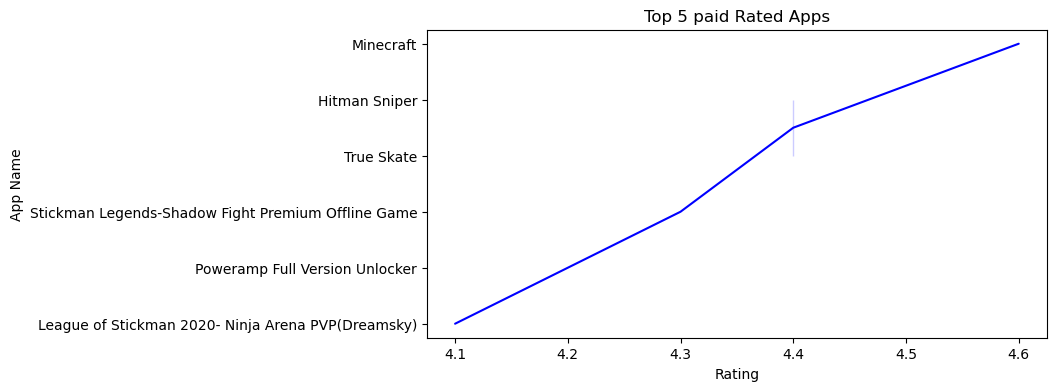

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 paid Rated Apps")
sns.lineplot(x=paid_apps.values, y =paid_apps.index,color='Blue')

Ans - Minecraft, hitman Sniper, True Skate, stickman Legends_Shadow figh Premium Offline Game, powerramp full version Unlocker, League of stickman 2020- ninja Arena PVP(Dreamsky)

### Q - what are the Top 5 Free Apps based with highest rating and Installs?

In [ ]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending= False)
free_apps = free_apps.head(5)

<Axes: title={'center': 'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

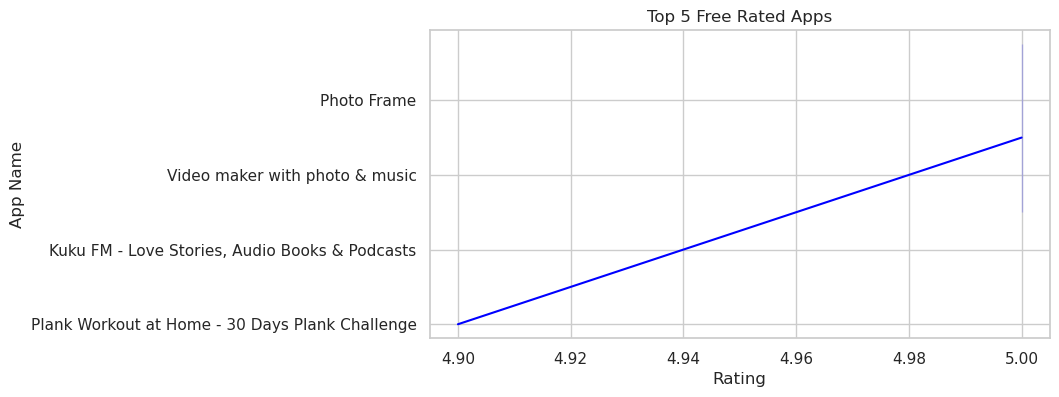

In [ ]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x= free_apps.values, y =free_apps.index,color='Blue')

### Ans - Photo Frame, Video maker with photo & music, kuku FM - Love stories, Audio Books & Podcasts, Plank Workout a Home.

## Visulize the categories that have the top 10 Max Installations

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

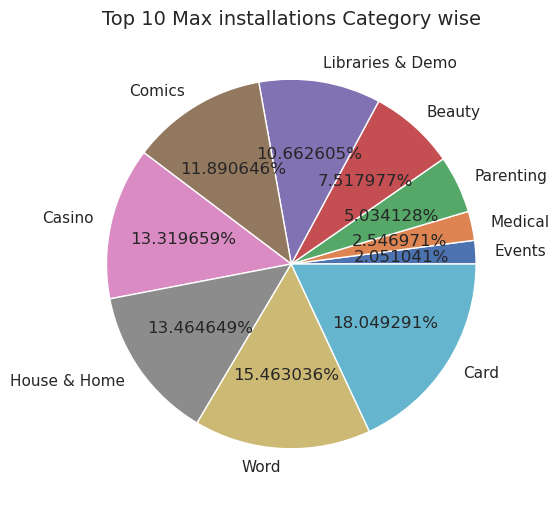

In [ ]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels, autopct='%0f%%')
plt.title("Top 10 Max installations Category wise", fontsize=14)

## Visulize the top 10 installation CATEGORIES THAT Adults have installed the most

In [ ]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

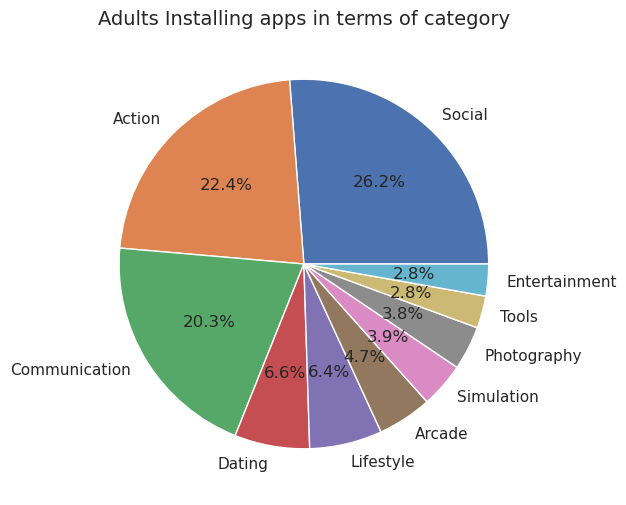

In [ ]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

### Observation :

- Most of the Adults showing interest in download the social, Action and Communication Category

## Visulize Teens Installing the apps in terms of Category

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

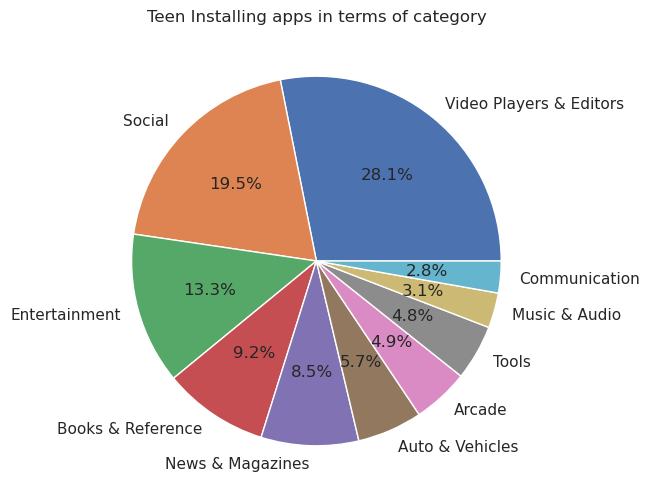

In [ ]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x= Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category")

## Summary and Conclusion:

- People are more interested to install the gamming Apps, the top Rating is given to the gaming apps.
- InAppPurchase are correlated to App Rating. So we can say that if app provides customers support and have subscription plans it will helps to engage customers.
- Most of the Adults installed the social and communication Apps.
- Most of the installation are done by teen and the most are vidio players and editors. Video players and editors are most in demand.
- Size of application varies the installation.
- People aare mostly downloaded the free apps
- The installation of free apps is High
- The availability of the free apps is very high.